In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
import datetime

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [2]:
# reading the data and also the computation time 
data = pd.read_csv('data-1.csv')

In [3]:
data.shape

(18207, 89)

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
pd.set_option('max_columns',100)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# lets describe the data for numerical columns 
pd.set_option('max_columns',100)
data.iloc[:,2:].describe().style.background_gradient(cmap='cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
# lets check the descriptive statistics for the categorical columns as well
data.iloc[:,13:].describe(include='object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


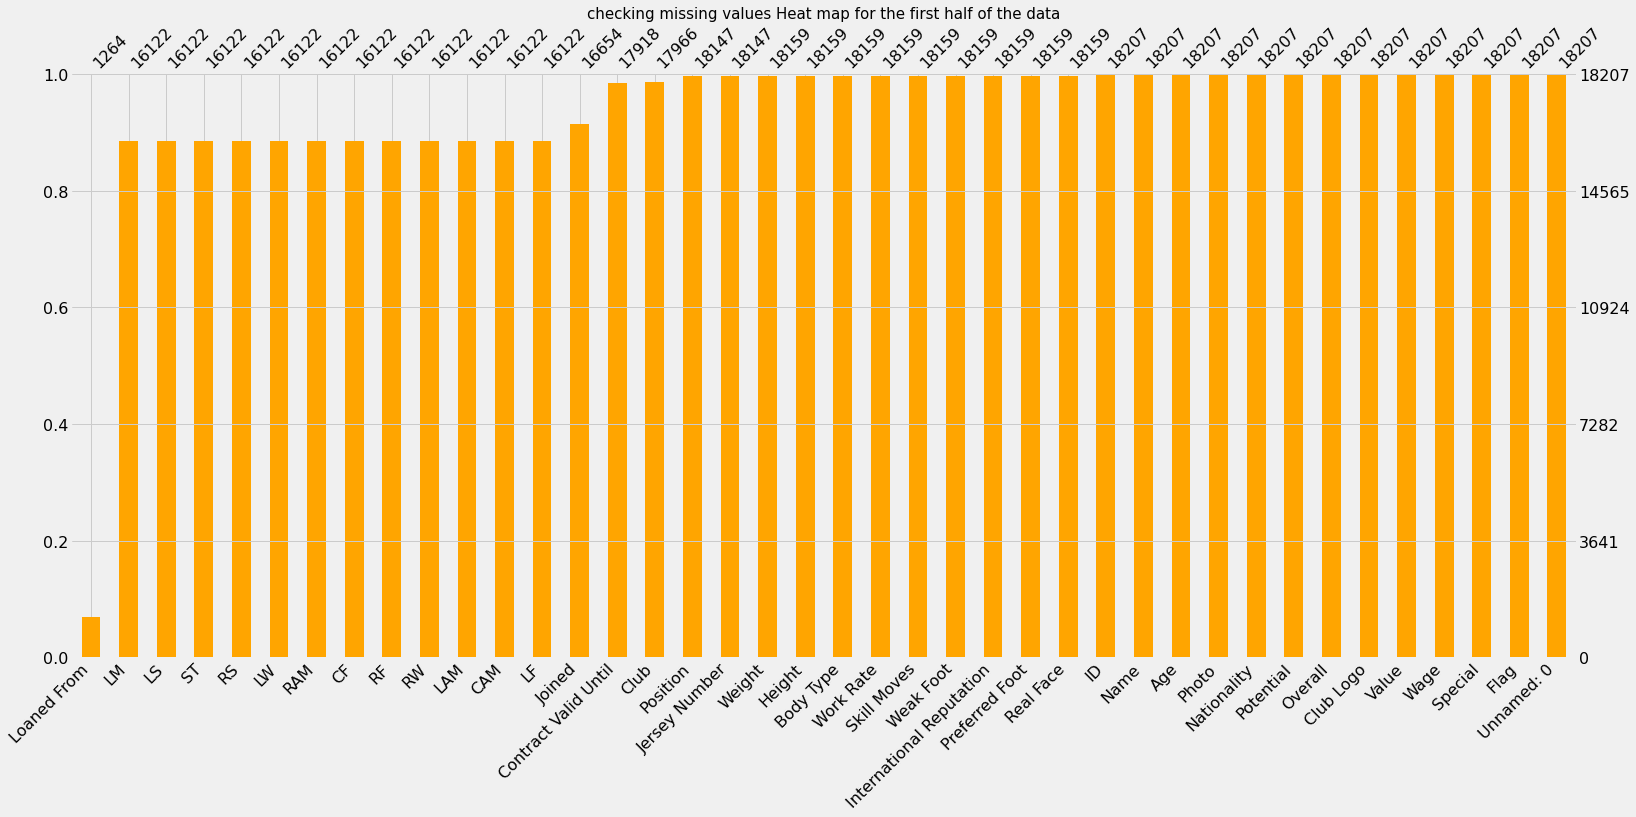

In [8]:
# checking if the data contains any NULL values 
# visualizing missing values as a matrix
mno.bar(data.iloc[:,:40],
       color = 'orange',
       sort = 'ascending')
plt.title('checking missing values Heat map for the first half of the data', fontsize=15)
plt.show()

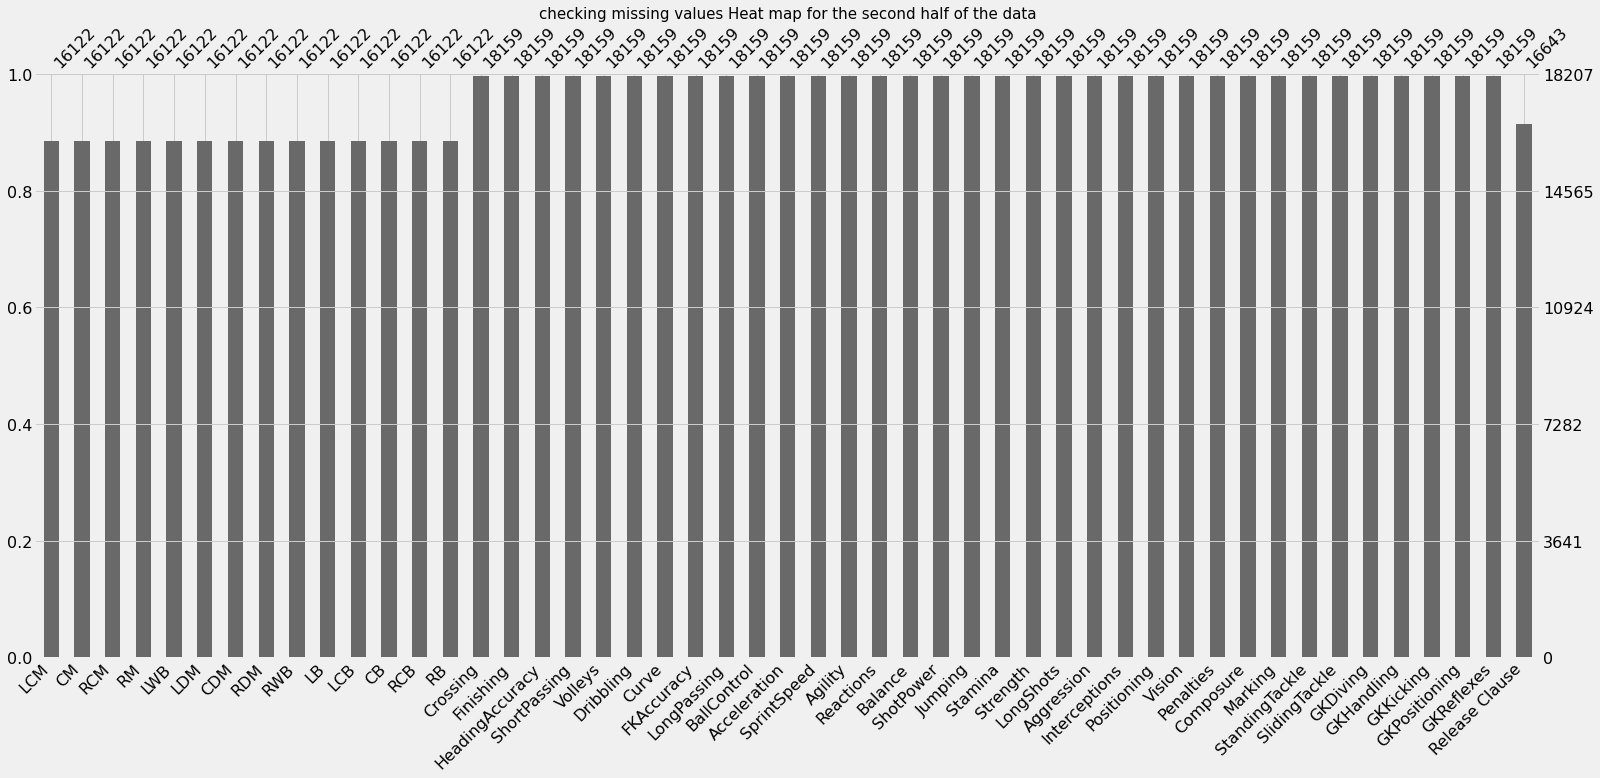

In [9]:
# for the second half
mno.bar(data.iloc[:,40:])
plt.title('checking missing values Heat map for the second half of the data', fontsize=15)
plt.show()

In [10]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)

data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [11]:
pd.set_option('max_rows', 100)
data.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS        

In [12]:
data.fillna(0, inplace=True)

In [13]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF        

Feature Engineering

In [14]:
# creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [15]:
# addid these categories to the data
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [16]:
# lets check the column names in the data after adding new features
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

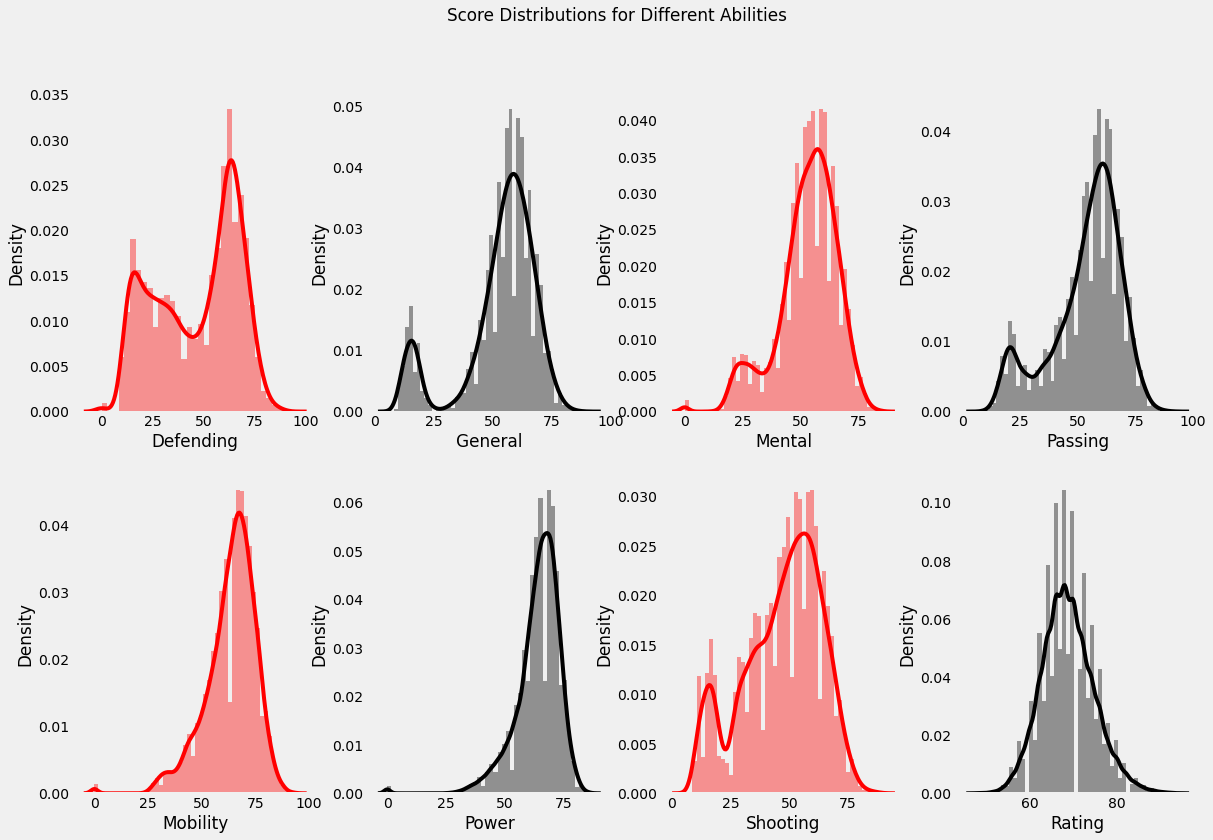

In [17]:
# Data Visualization 

# lets check the Distribution of Scores of Different Skills

plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


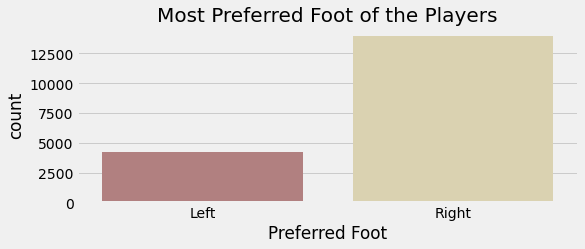

In [21]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

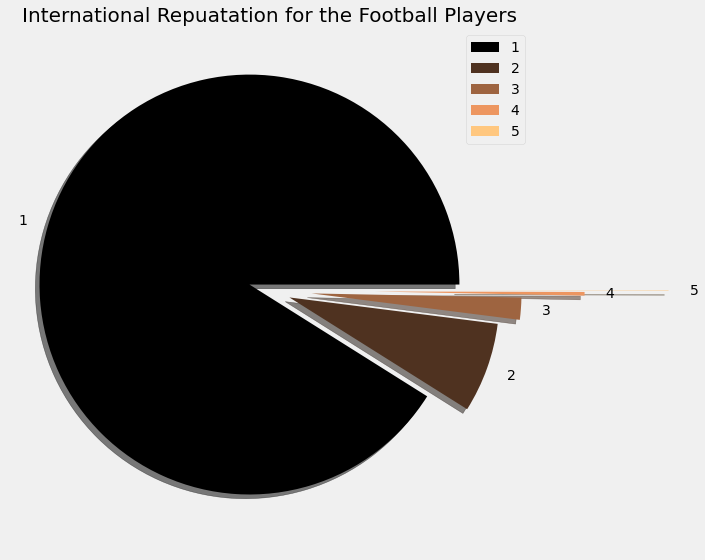

In [22]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']  #data['International Reputation'].index
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

In [23]:
# Players with international reputation as 5
data[data['International Reputation'] == 5][['Name','Nationality',
                            'Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


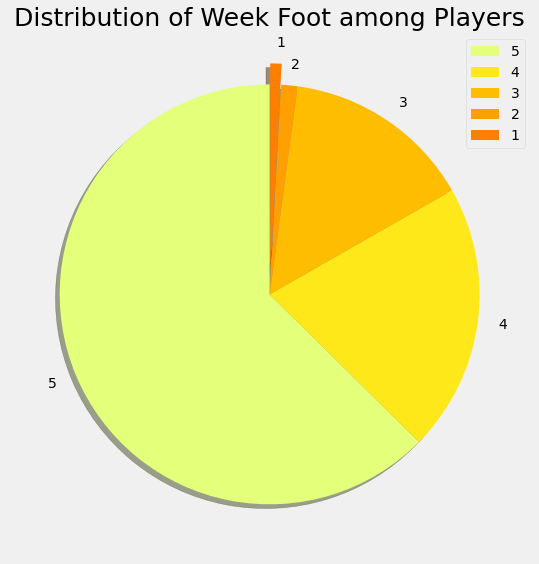

In [24]:
# plotting a pie chart to represent the share of weak foot players

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

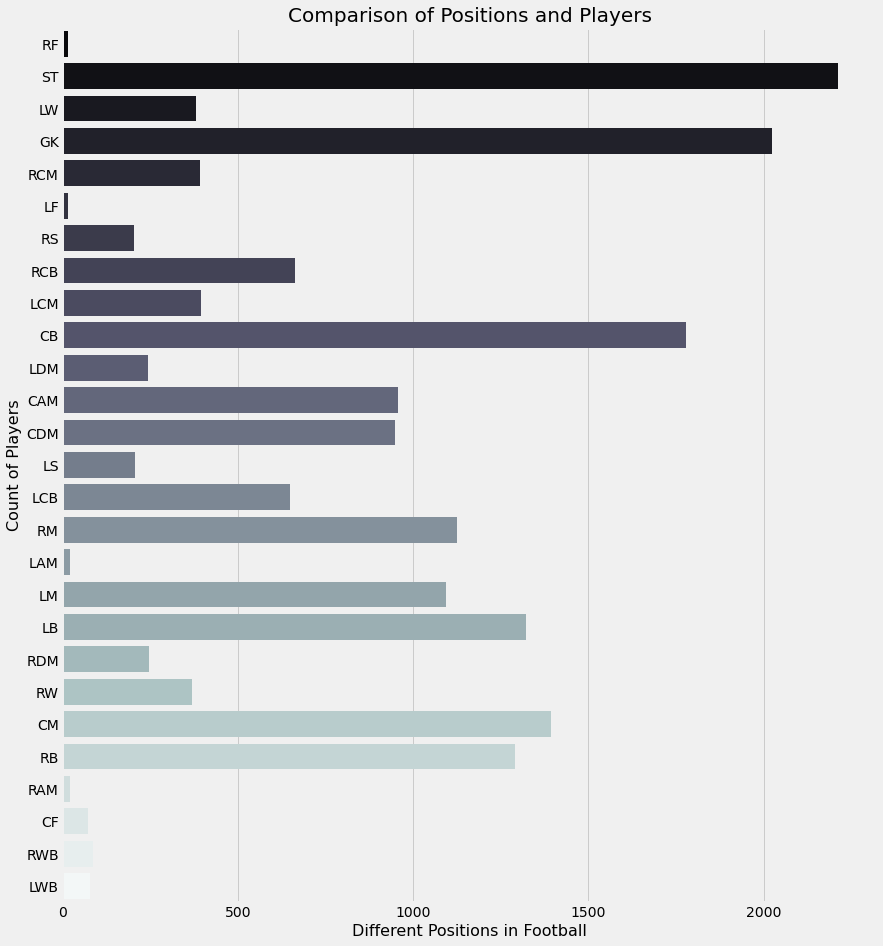

In [25]:
# different positions acquired by the players 

plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [26]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

In [27]:
# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


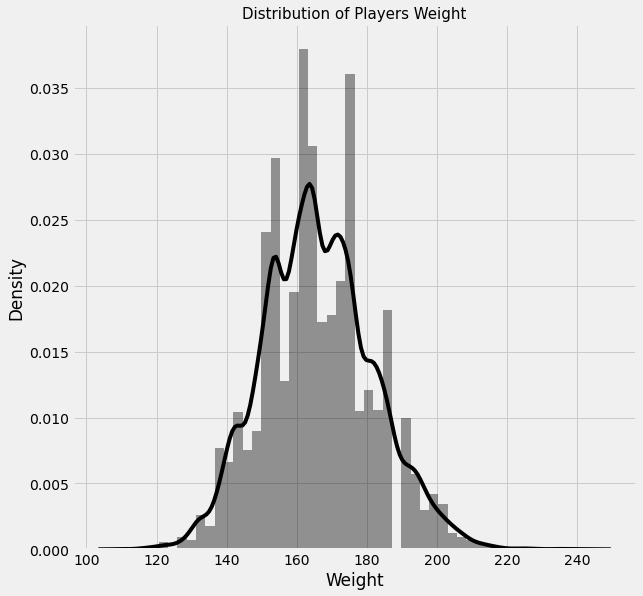

In [28]:
# plotting the distribution of weight of the players
sns.distplot(data['Weight'], color = 'black')
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

In [29]:
# defining a function for cleaning the wage column

def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


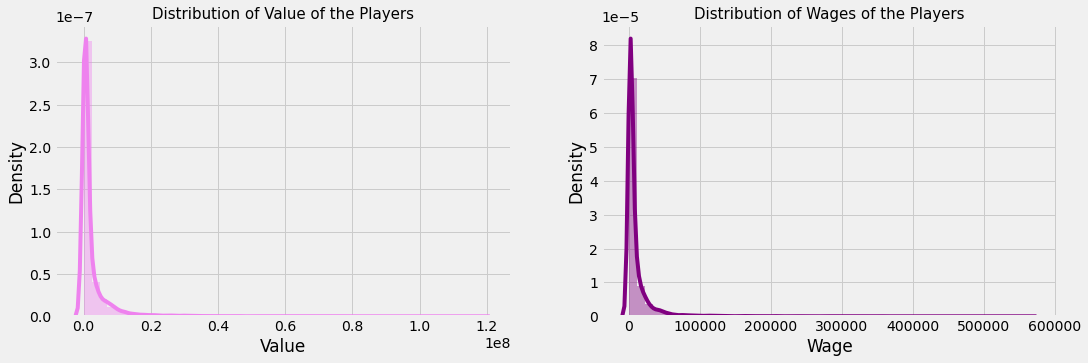

In [30]:
# applying the function to the wage and value column
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

# visualizing the data
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color = 'violet')
plt.title('Distribution of Value of the Players', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

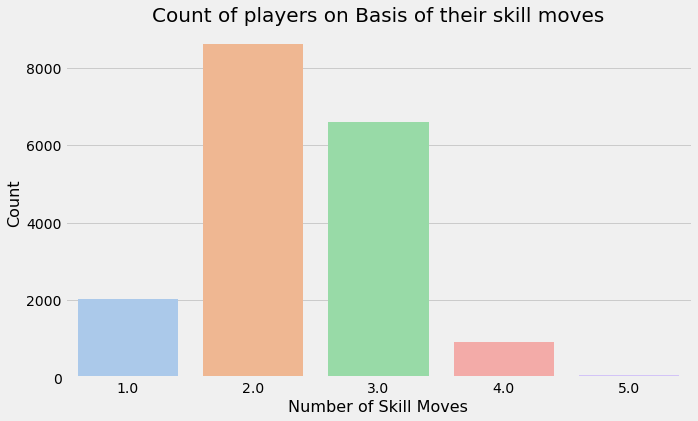

In [31]:
# Skill Moves of Players

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [32]:
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 20)][['Name','Age']]

,Name,Age
25,K. Mbappé,19
1004,J. Sancho,18
1143,Vinícius Júnior,17
2495,M. Ødegaard,19


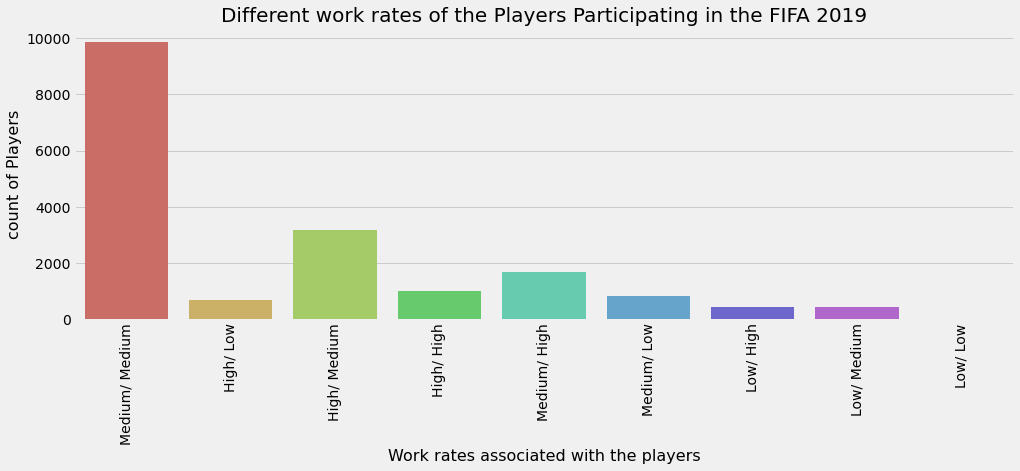

In [33]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


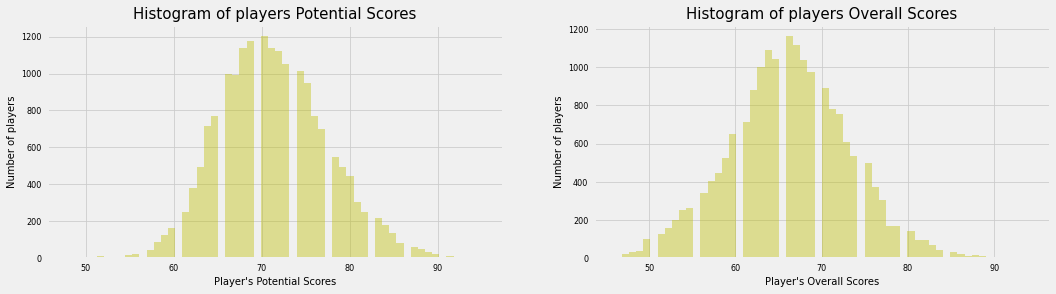

In [34]:
# To show Different potential scores of the players participating in the FIFA 2019

plt.figure(figsize=(16, 4))
plt.style.use('seaborn-paper')

plt.subplot(1, 2, 1)
x = data.Potential
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y = data.Overall
ax = sns.distplot(y, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


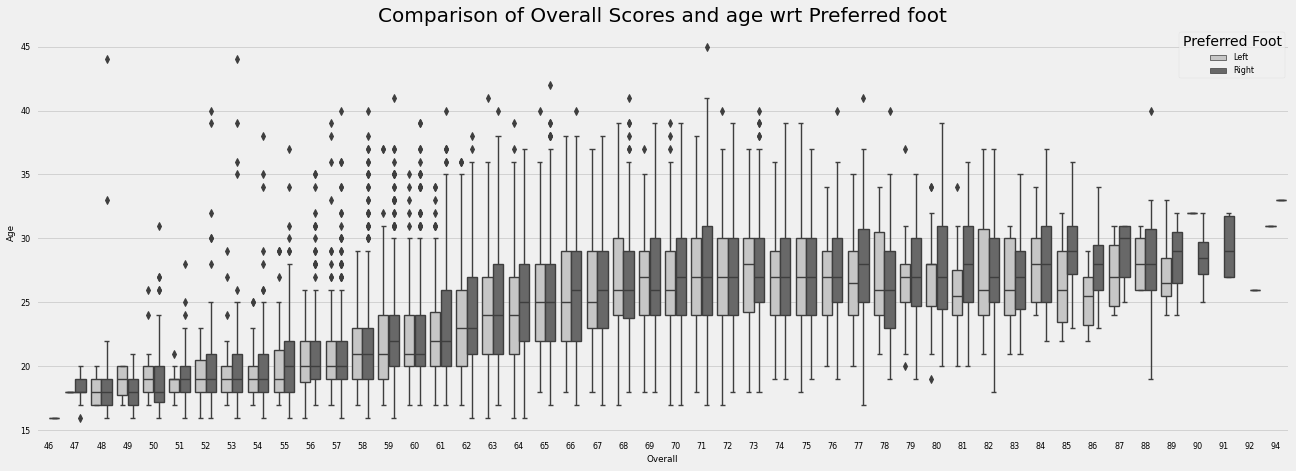

In [35]:
# violin plot 

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

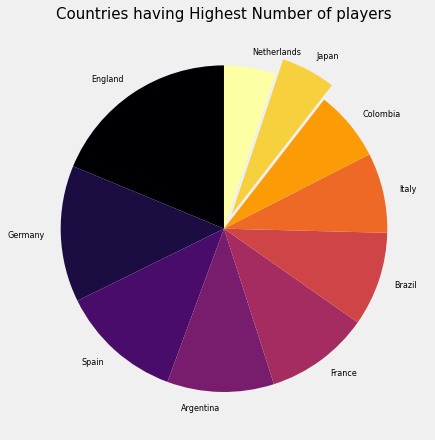

In [36]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                            startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

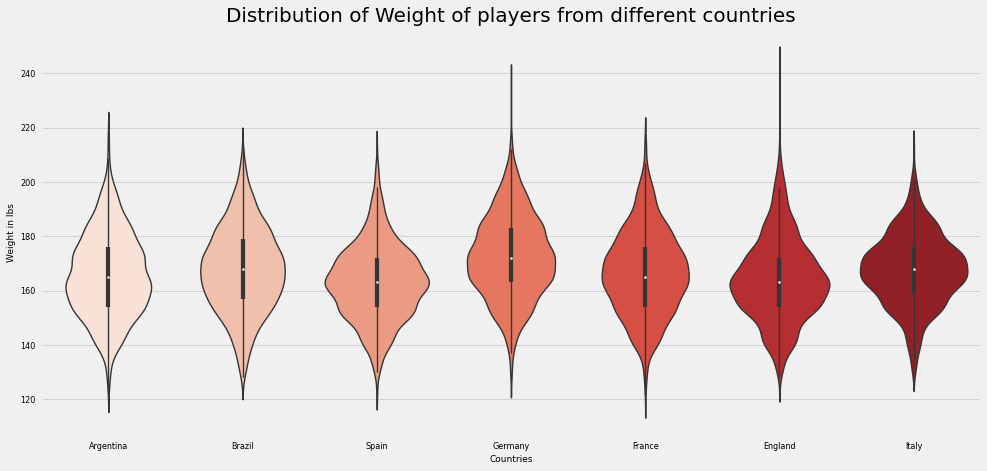

In [37]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

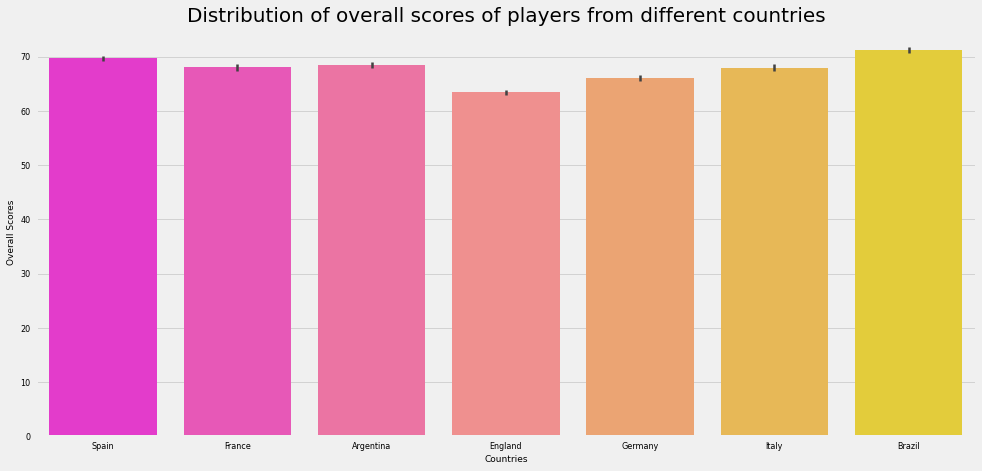

In [38]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

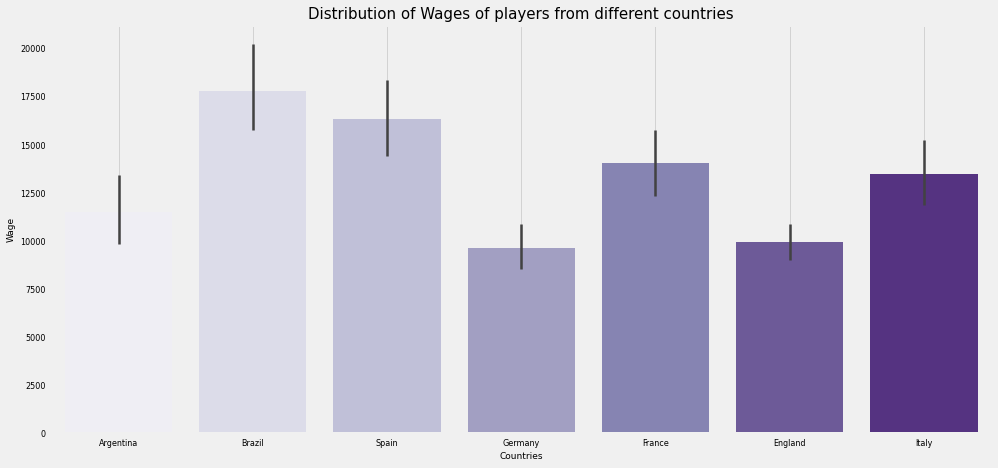

In [39]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.grid()
plt.show()

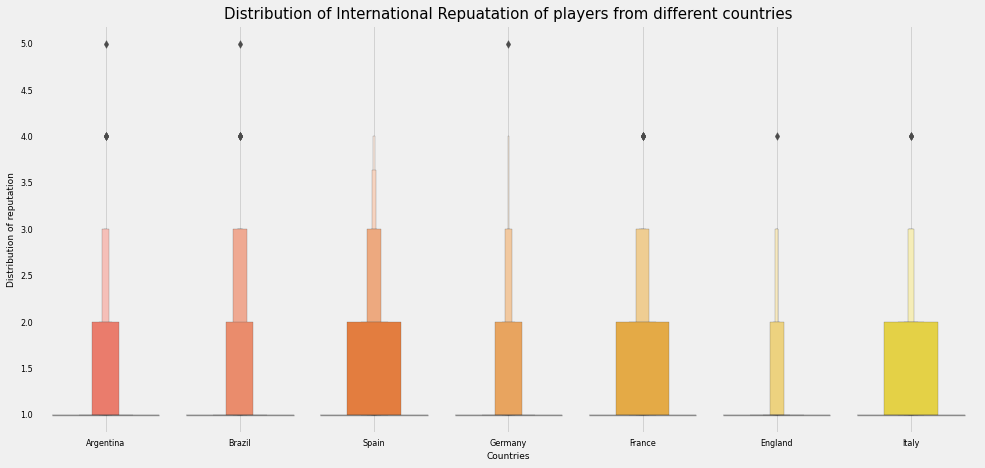

In [40]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.grid()
plt.show()

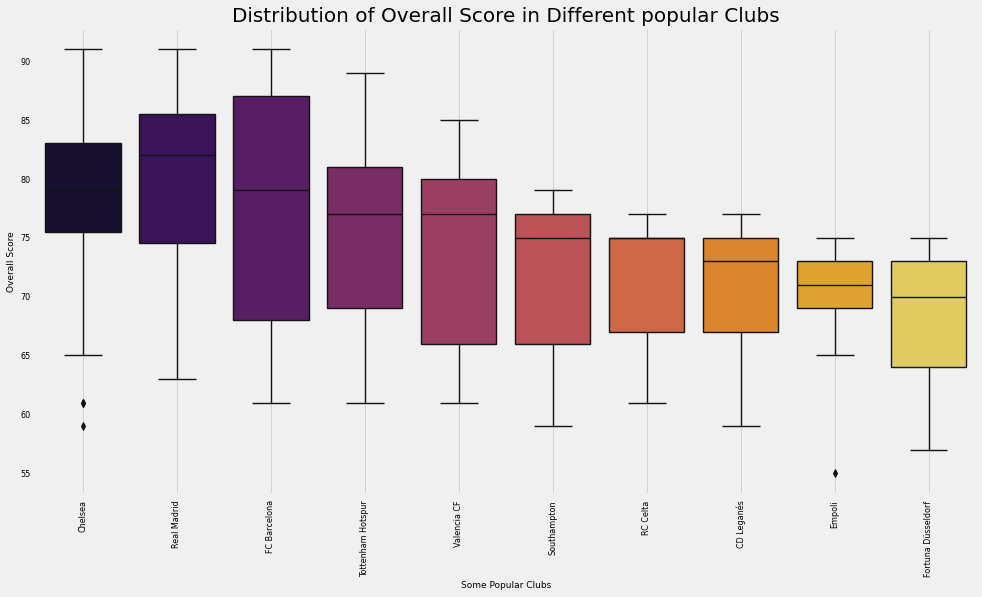

In [41]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

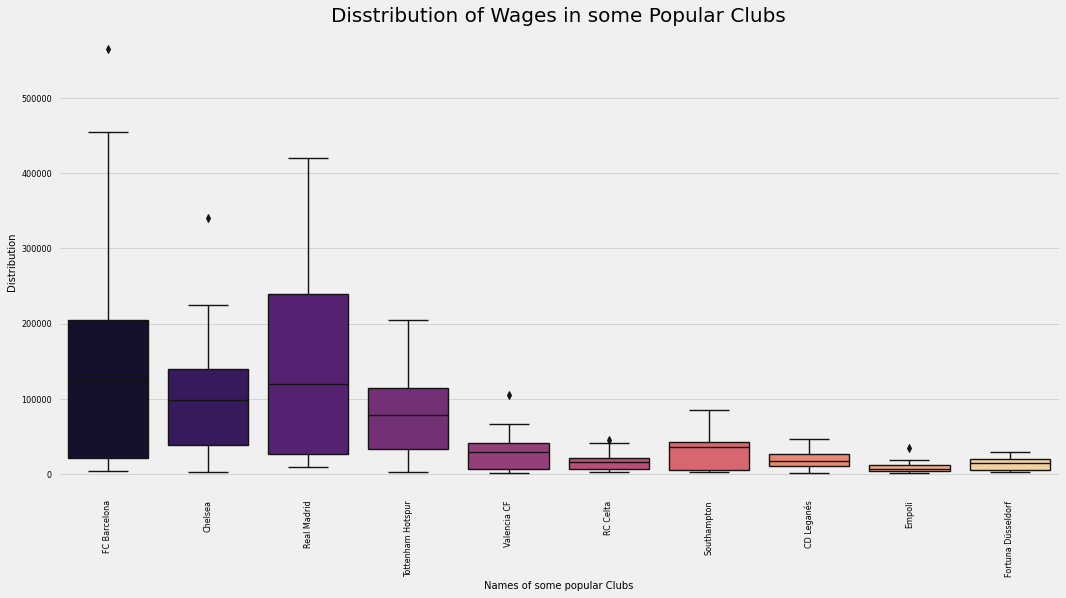

In [42]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

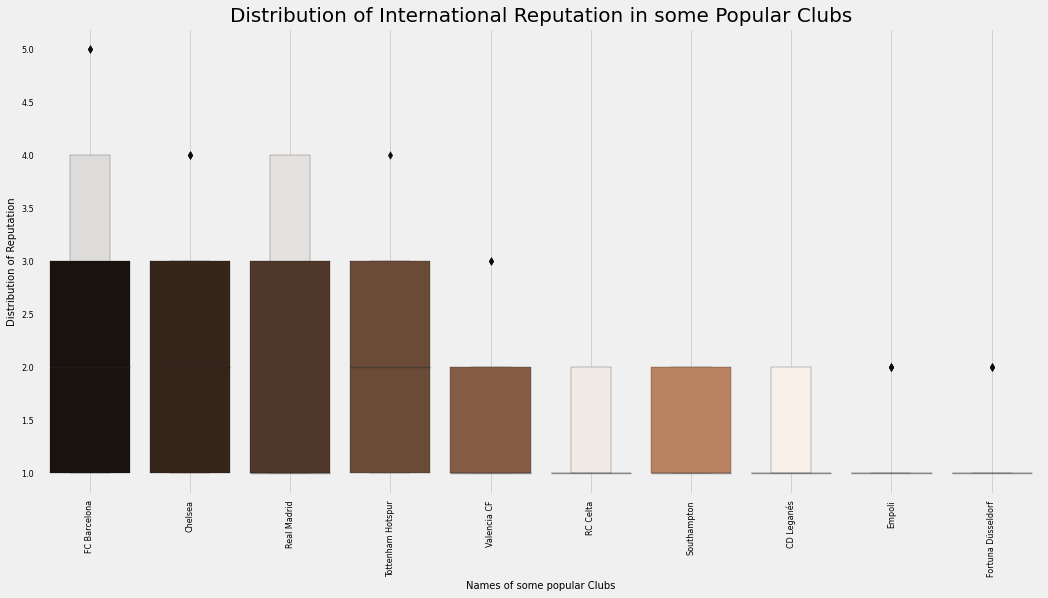

In [43]:
# Distribution of International Reputation in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxenplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'copper')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [ ]:
### Query Analysis ###

In [44]:
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                             'Nationality','Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [45]:
## Let's Analyze the Skills of Players

@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing', 
                       'Mobility', 'Power', 'Rating','Shooting'], score = 75):
    return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                    ascending = False).head(20).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [46]:
# lets make an interactive function for getting a report of the players country wise

# lets make a function to see the list of top 15 players from each country
@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][['Name','Position','Overall',
                    'Potential']].sort_values(by = 'Overall',
                            ascending = False).head(15).style.background_gradient(cmap = 'magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [47]:
# lets make an interactive function to get the list of top 15 players from each of the club

# lets define a function 
@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data[data['Club'] == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                     'Value','Contract Valid Until']].sort_values(by = 'Overall',
                                ascending  = False).head(15).style.background_gradient(cmap = 'inferno')

interactive(children=(Dropdown(description='club', options=('Burnley', 'Fortuna Düsseldorf', 'Chelsea', 'AS Mo…

In [48]:
# finding 5 youngest Players from the dataset

youngest = data[data['Age'] == 16][['Name', 'Age', 'Club', 'Nationality', 'Overall']]
youngest.sort_values(by = 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [49]:
# finding 15 eldest players from the dataset

data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [50]:
# The longest membership in the club

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap = 'Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,30
M. Al Shalhoub,Al Hilal,23
H. Sogahata,Kashima Antlers,23
M. Ogasawara,Kashima Antlers,23
S. Narazaki,Nagoya Grampus,22
M. Wölfli,BSC Young Boys,21
K. Kitamoto,Vissel Kobe,21
C. Källqvist,BK Häcken,20
Y. Endo,Gamba Osaka,20


In [51]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column = 'Years_of_member', 
          club = ['FC Barcelona', 'Real Madrid', 'Chelsea'], x = 4):
    return data[(data[column] > x) & (data['Club'] == club)][['Name', 'Club',
                                             'Years_of_member']].sort_values(by = 'Years_of_member',
                                                                ascending = False).style.background_gradient(cmap = 'magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

In [52]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

<ipython-input-52-058bc0b5a945>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():


Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

In [53]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10).style.background_gradient(cmap = 'bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [54]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10).style.background_gradient(cmap = 'copper')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


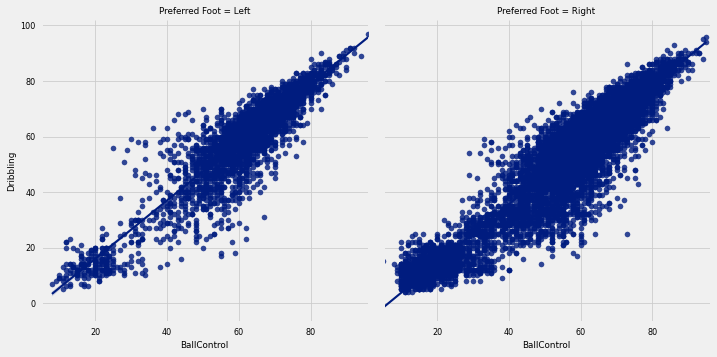

In [55]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()